### import os for  operating system operations e.g., creating a folder

In [64]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [65]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [66]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [67]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [68]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [69]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [70]:
true_values = dataset['WIND-SPEED']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [71]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [72]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [73]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [74]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [75]:

df = dataset[:]

### remove the date column

In [76]:

del df['DATE']

In [77]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [78]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [79]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [80]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [81]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [82]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

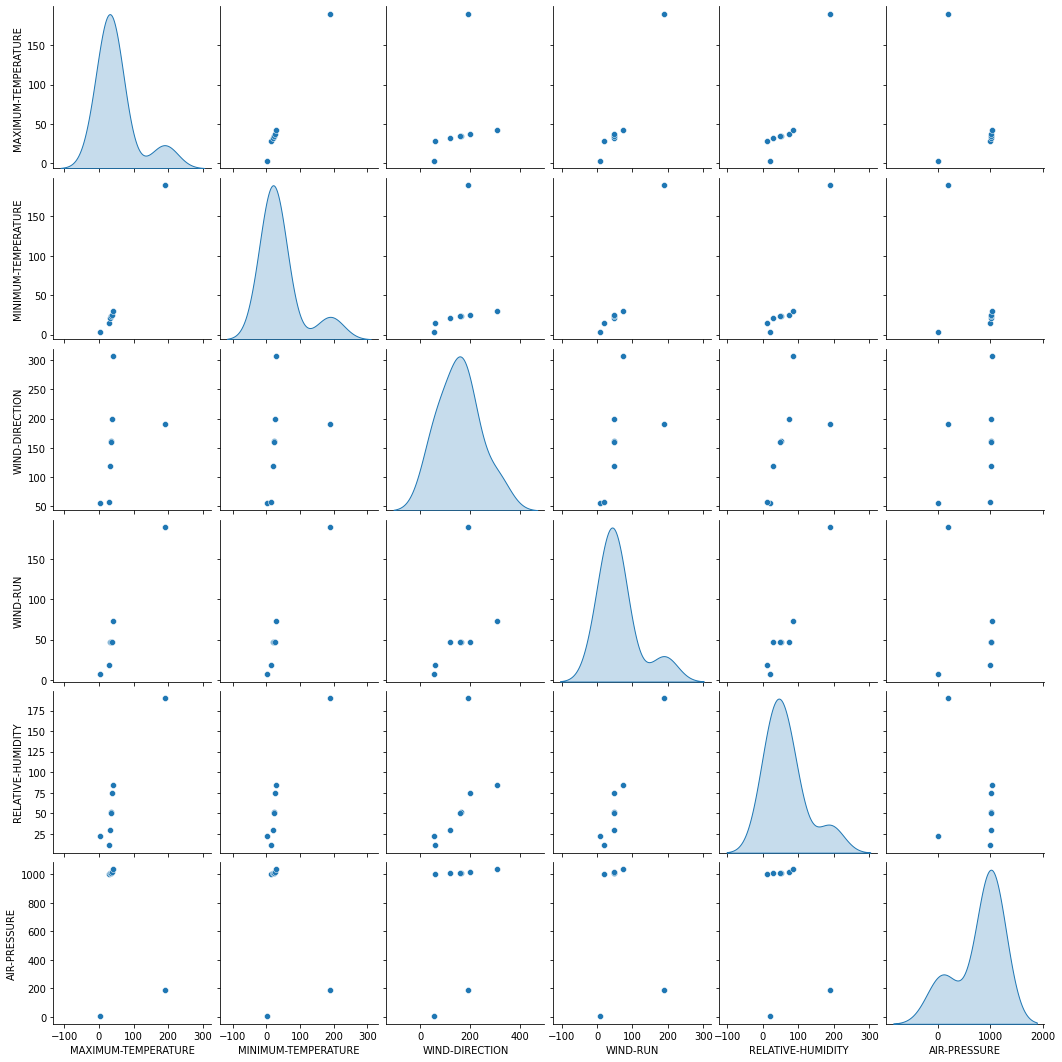

In [83]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-SPEED")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [84]:

train_stats = train_dataset.describe()
wind_speed=train_stats.pop("WIND-SPEED")
train_stats = train_stats.transpose()
#train_stats
wind_speed

count    190.000000
mean       3.442632
std        1.411901
min        0.800000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: WIND-SPEED, dtype: float64

## The label is "WIND-SPEED"

In [85]:
train_labels = train_dataset.pop('WIND-SPEED')
test_labels = test_dataset.pop('WIND-SPEED')
valid_labels = valid_dataset.pop('WIND-SPEED')

## Data Normalization/Scaling

### define a function to normalize the data set.

In [86]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-DIRECTION','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [87]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [88]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
162,0.261194,0.662162,0.546185,0.523723,0.675676,0.382789
126,0.261194,0.628378,0.582329,0.523723,0.972973,0.370920
181,0.835821,0.547297,0.120482,0.523723,0.135135,0.329377
163,0.186567,0.655405,0.080321,0.523723,0.797297,0.350148
202,0.597015,0.229730,0.204819,0.523723,0.297297,0.341246
155,0.522388,0.189189,0.088353,0.523723,0.324324,0.356083
64,0.664179,0.783784,0.389558,0.523723,0.675676,0.275964
195,0.895522,0.878378,0.542169,0.523723,0.337838,0.237389
46,0.611940,0.371622,0.453815,0.523723,0.581081,0.302671
207,0.902985,0.939189,0.493976,0.523723,0.445946,0.296736


## Build a Neural Network Model

### We declared a function for creating a model.

## import NN and other components.

In [89]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [90]:
def model_multilayer_perceptron_with_eight_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
      model.add(Dropout(0.5))
      model.add(Dense(72, Activation('relu'))) # Hidden layer 3
      model.add(Dropout(0.5))
      model.add(Dense(80, Activation('relu'))) # Hidden layer 4
      
      model.add(Dense(32, Activation('relu'))) # Hidden layer 5
      model.add(Dense(64, Activation('relu'))) # Hidden layer 6
      model.add(Dense(72, Activation('relu'))) # Hidden layer 7
      model.add(Dense(80, Activation('relu'))) # Hidden layer 8
     
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [91]:
model = model_multilayer_perceptron_with_eight_hidden_layer()
print('Here is a summary of this model: ')


model.summary()


Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_10 (Dropout)

## Training the model we built above.

In [92]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [93]:
# checkpoint_path
checkpoint_path = r".\models\wind_speed_prediction_8_layers_n_dropout.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [94]:
%%time

EPOCHS = 1000
batch_size = 6

model = model_multilayer_perceptron_with_eight_hidden_layer()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_13 (Dropout)

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.............................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


....
Epoch: 100, loss:2.6286,  mae:1.1749,  mape:34.4491,  mse:2.6286,  val_loss:3.2743,  val_mae:1.4803,  val_mape:38.8076,  val_mse:3.2743,  
...............

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.............................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


........................
Epoch: 200, loss:1.0061,  mae:0.7951,  mape:20.9186,  mse:1.0061,  val_loss:2.2239,  val_mae:1.2089,  val_mape:35.9850,  val_mse:2.2239,  
......................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


....................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


......................................................
Epoch: 300, loss:2.5520,  mae:1.3484,  mape:93.5879,  mse:2.5520,  val_loss:2.3613,  val_mae:1.2391,  val_mape:36.3279,  val_mse:2.3613,  
.............................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.....................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..
Epoch: 400, loss:1.9956,  mae:1.2206,  mape:24.5766,  mse:1.9956,  val_loss:1.4534,  val_mae:0.9891,  val_mape:37.8070,  val_mse:1.4534,  
.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


...................................................................................................
Epoch: 500, loss:0.6957,  mae:0.7140,  mape:31.1152,  mse:0.6957,  val_loss:2.2843,  val_mae:1.2164,  val_mape:35.8943,  val_mse:2.2843,  
......................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..............................................
Epoch: 600, loss:0.9671,  mae:0.8304,  mape:23.9348,  mse:0.9671,  val_loss:1.5063,  val_mae:1.0000,  val_mape:36.3302,  val_mse:1.5063,  
......................................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


.............................
Epoch: 700, loss:2.1697,  mae:1.3220,  mape:36.6603,  mse:2.1697,  val_loss:1.4465,  val_mae:0.9741,  val_mape:35.1826,  val_mse:1.4465,  
.....................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


...............................................................................
Epoch: 800, loss:1.8176,  mae:1.1799,  mape:68.3938,  mse:1.8176,  val_loss:1.5838,  val_mae:0.9911,  val_mape:33.4740,  val_mse:1.5838,  
..............................................................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets



Epoch: 900, loss:1.5157,  mae:1.0112,  mape:32.6954,  mse:1.5157,  val_loss:1.3160,  val_mae:0.9363,  val_mape:35.6200,  val_mse:1.3160,  
..................................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction_8_layers_n_dropout.ckpt\assets


..................................Wall time: 2min 49s


In [95]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1.964195,1.183922,1.964195,30.178183,1.281756,0.924246,1.281756,35.109280,995
996,0.128980,0.313193,0.128980,9.345394,1.287495,0.924905,1.287495,34.872921,996
997,1.439079,1.037244,1.439079,36.890102,1.399257,0.944940,1.399257,33.166531,997
998,0.574049,0.561623,0.574049,18.172689,1.394685,0.942692,1.394685,33.084515,998
999,1.688857,1.033146,1.688857,57.016521,1.353739,0.933421,1.353739,33.246052,999


In [96]:
# Test the model after training
example_result_test= model.predict(normed_test_data)

## Compare the predicted values with the actual values

In [97]:
print('Predicted Values')
print(example_result_test[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[2.80611  ]
 [3.207864 ]
 [3.2135363]
 [3.0967894]
 [3.1651287]
 [2.8842602]
 [3.4892356]
 [3.239999 ]
 [3.2230263]
 [3.1724954]]

Actual Values
2.2
3.0
1.3
3.0
3.0
1.1
3.0
3.0
2.0
3.0


In [98]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1.964195,1.183922,1.964195,30.178183,1.281756,0.924246,1.281756,35.109280,995
996,0.128980,0.313193,0.128980,9.345394,1.287495,0.924905,1.287495,34.872921,996
997,1.439079,1.037244,1.439079,36.890102,1.399257,0.944940,1.399257,33.166531,997
998,0.574049,0.561623,0.574049,18.172689,1.394685,0.942692,1.394685,33.084515,998
999,1.688857,1.033146,1.688857,57.016521,1.353739,0.933421,1.353739,33.246052,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

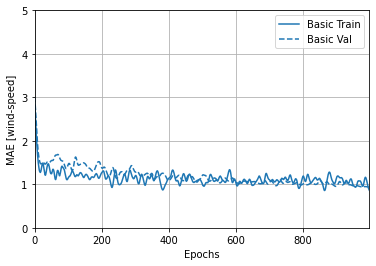

In [99]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,5])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

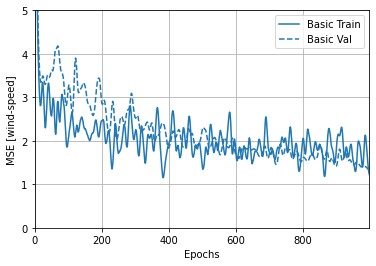

In [100]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5])
plt.ylabel('MSE [wind-speed]')

In [101]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2.0378 - mae: 1.1230 - mse: 2.0378 - mape: 36.3214
Train set Mean Abs Error :  1.12
Train set Mean Square Error :  2.04


In [102]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1.3537 - mae: 0.9334 - mse: 1.3537 - mape: 33.2461
Validation set Mean Abs Error :  0.93
Validation set Mean Square Error :  1.35


In [103]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2.6146 - mae: 1.0825 - mse: 2.6146 - mape: 54818148.0000
Testing set Mean Abs Error :  1.08
Testing set Mean Square Error :  2.61


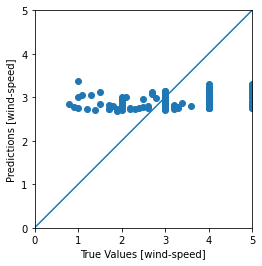

In [104]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

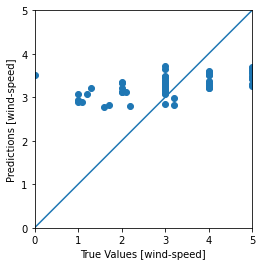

In [105]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

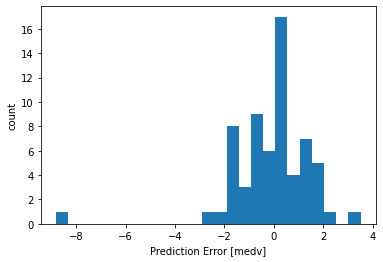

In [106]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")